This should be runned using the `sumo-env`

In [1]:
import os
import sys
import shutil
import csv

if 'SUMO_HOME' in os.environ:
    sys.path.append(os.path.join(os.environ['SUMO_HOME'], 'tools'))
import matplotlib.pyplot as plt
import pandas as pd
import traci

sys.path.append(os.path.abspath("../src"))
from sim import sumo_helper
from sim import sumo_simulation

FOLDER_NAME = "../src/sumo_map/Town01" # Path to SUMO map folder
mapname = FOLDER_NAME.split('/')[-1] # Name of the map

In [2]:
delta_time = 0.1 # This delta time has to be the same as the one used in CARLA
end_time = 0 # 0 means no end time, the simulation will run until all vehicles finish their route

## Fixed Parameters

In [3]:
# ignore the first line (header) and read the rest as dictionaries
with open(f"{FOLDER_NAME}/id_to_vtype_fixed.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id_styles = {row['id']: row['style'] for row in reader}
    
id_styles
routine_ids = list(id_styles.keys())
veh_style_per_student = list(id_styles.values())
routine_ids

['veh_0_normal',
 'veh_0_aggressive',
 'veh_1_normal',
 'veh_1_aggressive',
 'veh_2_normal',
 'veh_2_aggressive',
 'veh_3_normal',
 'veh_3_aggressive',
 'veh_4_normal',
 'veh_4_aggressive',
 'veh_5_normal',
 'veh_5_aggressive',
 'veh_6_normal',
 'veh_6_aggressive',
 'veh_7_normal',
 'veh_7_aggressive',
 'veh_8_normal',
 'veh_8_aggressive',
 'veh_9_normal',
 'veh_9_aggressive']

### Fixed Parameters (no traffic)

In [4]:
output_data_path = f"../data/synthetic/{mapname}/sumo/fixed/no_traffic"
experiment2_file = 'finaltrips_fixed.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'finaltrips_fixed.rou.xml'.
XML file updated and formatted successfully.


True

In [ ]:
veh_variables, runtime = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
sumo_simulation.save_data(veh_variables, output_data_path, delta_time, runtime, new_dir=True, verify=True, use_lat_lon=False)

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Vehicle veh_0_aggressive has departed
Step #958.20 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 0 BUF 0)                     tep #450.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 2 BUF 0)                     
Data saved in ../data/synthetic/Town01/sumo/fixed/no_traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/fixed/no_traffic/metadata.csv


### Fixed Parameters (traffic)

In [5]:
output_data_path = f"../data/synthetic/{mapname}/sumo/fixed/traffic"
experiment2_file = 'merged_fixed.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'merged_fixed.rou.xml'.
XML file updated and formatted successfully.


True

In [6]:
try:
    veh_variables, exec_time = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, exec_time=exec_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Step #440.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 46 ACT 7 BUF 0)                    Vehicle veh_0_aggressive has departed
Step #1340.00 (1ms ~= 100.00*RT, ~8000.00UPS, TraCI: 0ms, vehicles TOT 137 ACT 8 BUF 0)   ep #900.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 93 ACT 7 BUF 0)                    Vehicle veh_1_normal has departed
Step Vehicle veh_1_aggressive has departed vehicles TOT 228 ACT 9 BUF 0)                   #1800.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 184 ACT 8 BUF 0)                  


SVehicle veh_2_normal has departed7000.00UPS, TraCI: 1ms, vehicles TOT 321 ACT 7 BUF 0)   
Step #3610.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 367 ACT 7 BUF 0)                  Vehicle veh_2_aggressive has departed
Vehicle veh_3_normal has departed~9000.00UPS, TraCI: 0ms, vehicles TOT 477 ACT 9 BUF 0)   p #4070.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 414 ACT 8 BUF 0)                   #4520.00 (1ms ~= 100.00*RT, ~6000.00UPS, TraCI: 0ms, vehicles TOT 458 ACT 6 BUF 1)   


Step #5150.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 523 ACT 7 BUF 0)                  Vehicle veh_3_aggressive has departed
Step #6050.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 614 ACT 9 BUF 0)                  ep #5610.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 569 ACT 6 BUF 1)                  Vehicle veh_4_normal has departed
Step #6500.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 660 ACT 6 BUF 0)                  

SVehicle veh_4_aggressive has departed0ms, vehicles TOT 714 ACT 5 BUF 1)                  
SteVehicle veh_5_normal has departed: 0ms, vehicles TOT 806 ACT 7 BUF 0)                  ep #7510.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 762 ACT 7 BUF 0)                  
Step #8400.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 852 ACT 9 BUF 0)                  Vehicle veh_5_aggressive has departed


Vehicle veh_6_normal has departed
Step #10110.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1013 ACT 1 BUF 0)                tep #9670.00 (1ms ~= 100.00*RT, ~8000.00UPS, TraCI: 0ms, vehicles TOT 981 ACT 8 BUF 0)   Vehicle veh_6_aggressive has departed
StepVehicle veh_7_normal has departed: 0ms, vehicles TOT 1014 ACT 1 BUF 0)                p #10570.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1014 ACT 1 BUF 0)                
Step #Vehicle veh_7_aggressive has departed vehicles TOT 1015 ACT 0 BUF 0)                #11470.00 (1ms ~= 100.00*RT, ~1000.00UPS, TraCI: 0ms, vehicles TOT 1015 ACT 1 BUF 0) 
Step #12360.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1016 ACT 1 BUF 0)                Vehicle veh_8_normal has departed
Step #13260.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1017 ACT 1 BUF 0)                820.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1017 ACT 1 BUF 0)                Vehicle veh_8_aggressive has departed
Step #14170.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1018

## LLM Parameters

In [7]:
# ignore the first line (header) and read the rest as dictionaries
with open(f"{FOLDER_NAME}/id_to_vtype_llm.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id_styles = {row['id']: row['style'] for row in reader}
    
id_styles
routine_ids = list(id_styles.keys())
veh_style_per_student = list(id_styles.values())
routine_ids

['veh_0_normal',
 'veh_0_aggressive',
 'veh_1_normal',
 'veh_1_aggressive',
 'veh_2_normal',
 'veh_2_aggressive',
 'veh_3_normal',
 'veh_3_aggressive',
 'veh_4_normal',
 'veh_4_aggressive',
 'veh_5_normal',
 'veh_5_aggressive',
 'veh_6_normal',
 'veh_6_aggressive',
 'veh_7_normal',
 'veh_7_aggressive',
 'veh_8_normal',
 'veh_8_aggressive',
 'veh_9_normal',
 'veh_9_aggressive']

### LLM Parameters (no traffic)

In [12]:
output_data_path = f"../data/synthetic/{mapname}/sumo/llm/no_traffic"
experiment2_file = 'finaltrips_llm.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'finaltrips_llm.rou.xml'.
XML file updated and formatted successfully.


True

In [13]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_aggressive has departed


Step #1036.60 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1 ACT 0 BUF 0)                    
Data saved in ../data/synthetic/Town01/sumo/llm/no_traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/llm/no_traffic/metadata.csv


### LLM Parameters (traffic)

In [8]:
output_data_path = f"../data/synthetic/{mapname}/sumo/llm/traffic"
experiment2_file = 'merged_llm.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'merged_llm.rou.xml'.
XML file updated and formatted successfully.


True

In [9]:
try:
    veh_variables, exec_time = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, exec_time=exec_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Step #440.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 46 ACT 7 BUF 0)                    Vehicle veh_0_aggressive has departed


SVehicle veh_1_normal has departed7000.00UPS, TraCI: 0ms, vehicles TOT 151 ACT 7 BUF 0)   
SteVehicle veh_1_aggressive has departeds, vehicles TOT 242 ACT 6 BUF 0)                  ep #1940.00 (1ms ~= 100.00*RT, ~9000.00UPS, TraCI: 0ms, vehicles TOT 198 ACT 9 BUF 0)   
Vehicle veh_2_normal has departedaCI: 0ms, vehicles TOT 320 ACT 8 BUF 0)                   #2840.00 (1ms ~= 100.00*RT, ~5000.00UPS, TraCI: 0ms, vehicles TOT 289 ACT 5 BUF 0)   
Step #3220.00 (1ms ~= 100.00*RT, ~9000.00UPS, TraCI: 0ms, vehicles TOT 327 ACT 9 BUF 0)   

Step #3670.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 372 ACT 8 BUF 0)                  Vehicle veh_2_aggressive has departed
Vehicle veh_3_normal has departedaCI: 0ms, vehicles TOT 486 ACT 8 BUF 0)                  0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 419 ACT 8 BUF 0)                  ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 464 ACT 7 BUF 0)                  


Step #5260.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 534 ACT 8 BUF 0)                  Vehicle veh_3_aggressive has departed


Vehicle veh_4_normal has departed
Step #7000.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 710 ACT 12 BUF 0)                 tep #6560.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 666 ACT 9 BUF 0)                  Vehicle veh_4_aggressive has departed


Vehicle veh_5_normal has departed
StVehicle veh_5_aggressive has departed00UPS, TraCI: 0ms, vehicles TOT 880 ACT 8 BUF 0)   tep #8240.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 836 ACT 8 BUF 0)                  
StepVehicle veh_6_normal has departed 1ms, vehicles TOT 971 ACT 6 BUF 0)                  p #9140.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 927 ACT 9 BUF 0)                  
Step #10030.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1013 ACT 3 BUF 0)                Vehicle veh_6_aggressive has departed
Step #10930.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1014 ACT 1 BUF 0)                10490.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1014 ACT 1 BUF 0)                Vehicle veh_7_normal has departed
Step #118Vehicle veh_7_aggressive has departedhicles TOT 1015 ACT 1 BUF 0)                390.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1015 ACT 1 BUF 0)                


Vehicle veh_8_normal has departed
Step #13290.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1017 ACT 1 BUF 0)                tep #12850.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1017 ACT 1 BUF 0)                Vehicle veh_8_aggressive has departed


SVehicle veh_9_normal has departedaCI: 1ms, vehicles TOT 1018 ACT 0 BUF 0)                
SteVehicle veh_9_aggressive has departedms, vehicles TOT 1019 ACT 1 BUF 0)                ep #14720.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1019 ACT 1 BUF 0)                
Step #15849.20 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 1020 ACT 0 BUF 0)                


Data saved in ../data/synthetic/Town01/sumo/llm/traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/llm/traffic/metadata.csv


## Plots and Visualization

In [12]:
def plot_df(df, title, output_path):
    fig, axs = plt.subplots(1, 2, figsize=(25, 5))

    time_str = 'Time(s)'
    # Plot acc
    axs[0].plot(df['timestamp'], df['acc'], label='acc')
    axs[0].set_title('Acceleration over Time')
    axs[0].set_xlabel(time_str)
    axs[0].set_ylabel('acc (m/s²)')
    axs[0].legend()
    axs[0].grid(True)
    
    # Plot x_pos vs y_pos, colored by time
    sc = axs[1].scatter(df['x_pos'], df['y_pos'], c=df['timestamp'], cmap='viridis', label='Trajectory')
    axs[1].set_title('Trajectory: x_pos vs y_pos (colored by time)')
    axs[1].set_xlabel('x_pos')
    axs[1].set_ylabel('y_pos')
    axs[1].grid(True)
    cbar = plt.colorbar(sc, ax=axs[1])
    cbar.set_label(time_str)

    plt.suptitle(title)
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
        print(f"Figure saved to {output_path}")

    plt.show()

Figure saved to ../results/figures/sumo/Town01/aggressive_fixed.png


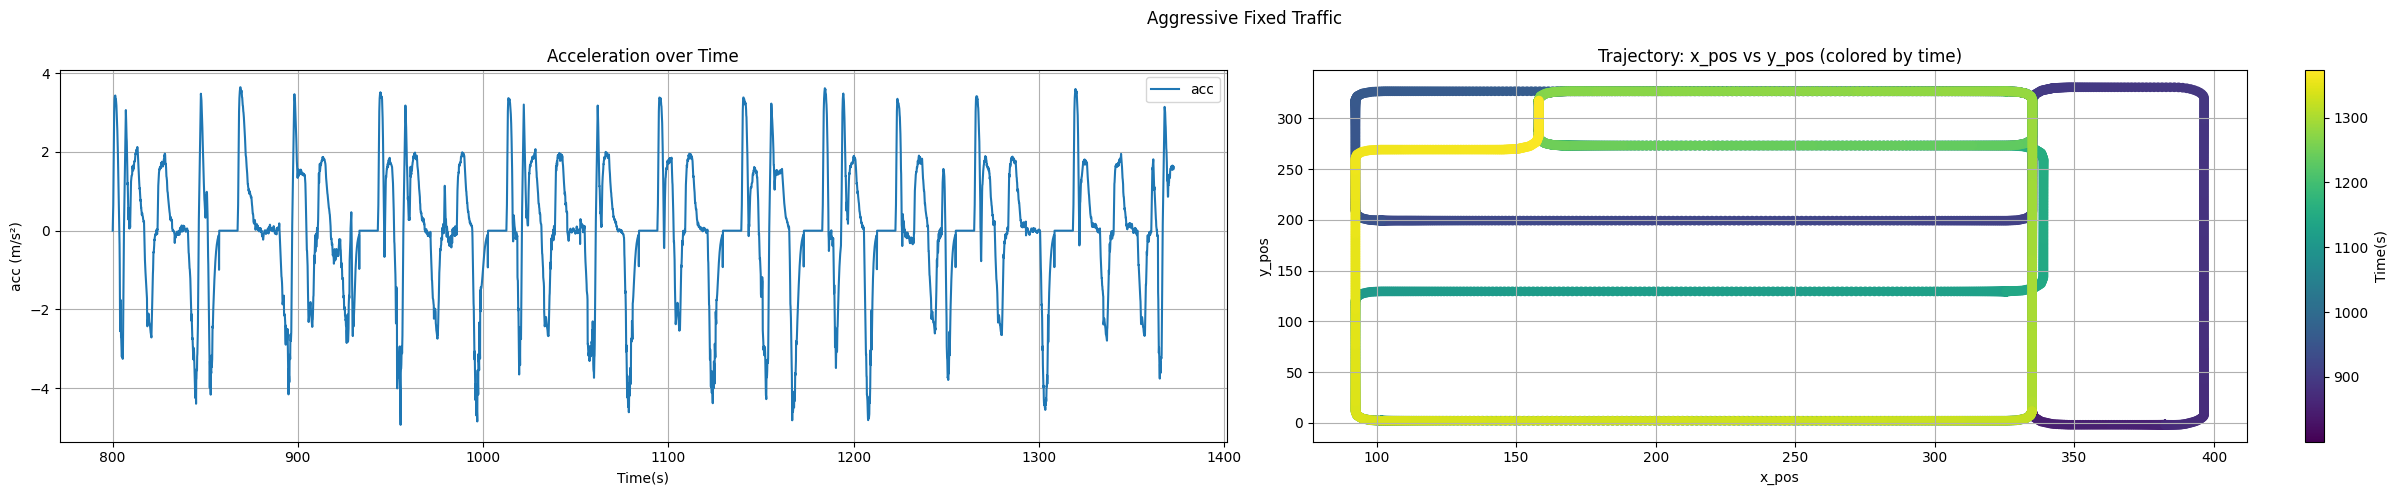

Figure saved to ../results/figures/sumo/Town01/aggressive_llm.png


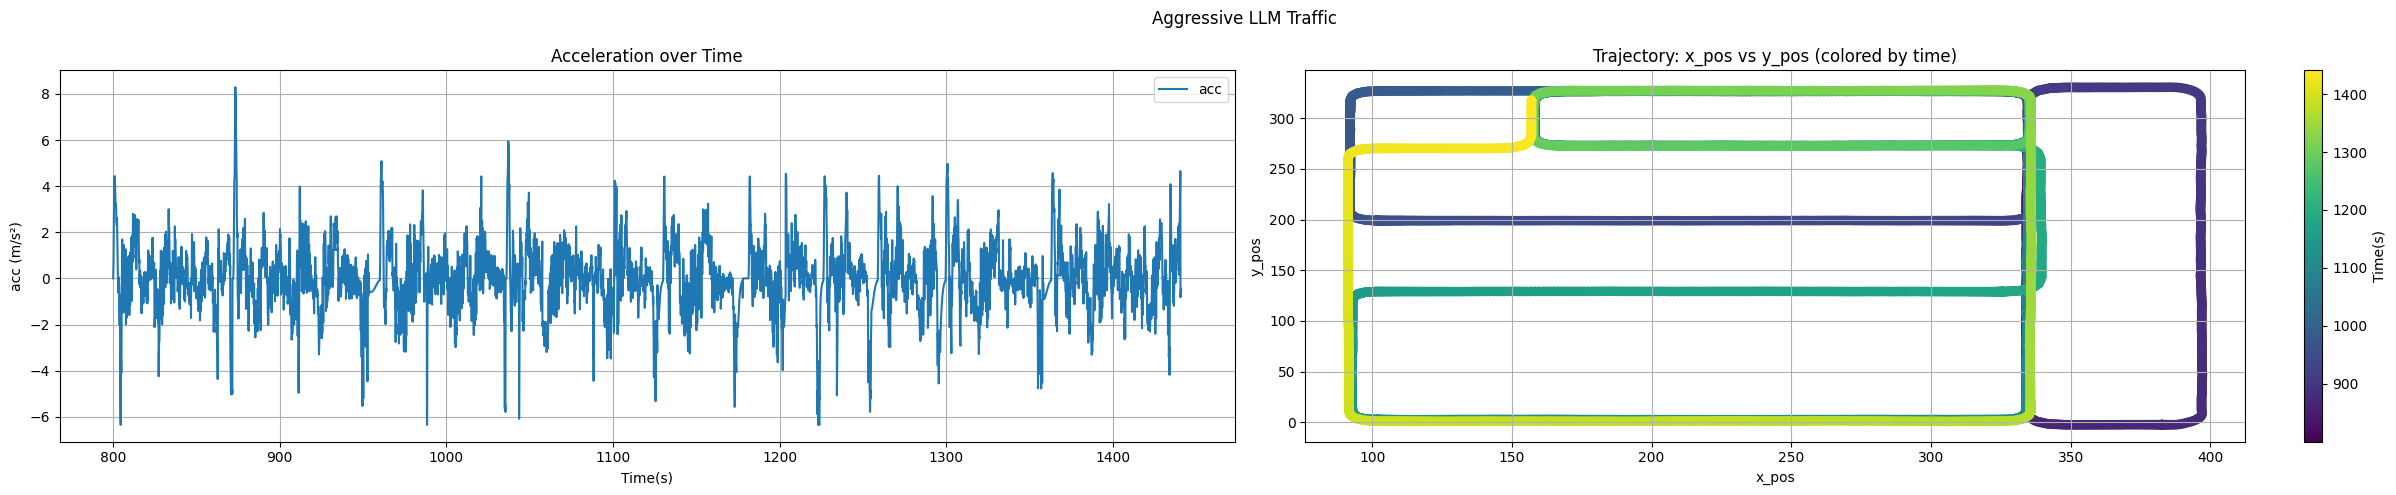

Figure saved to ../results/figures/sumo/Town01/normal_fixed.png


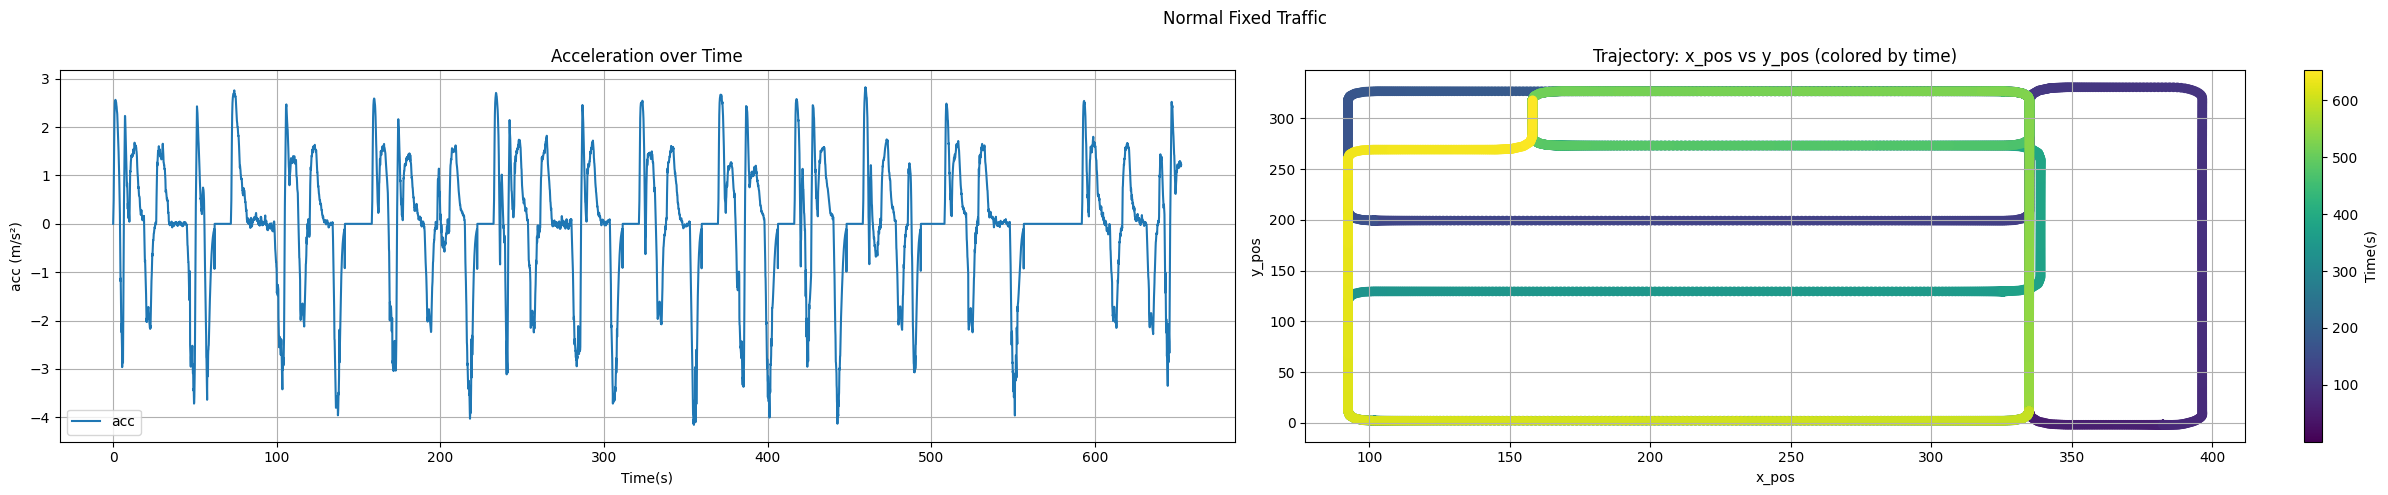

Figure saved to ../results/figures/sumo/Town01/normal_llm.png


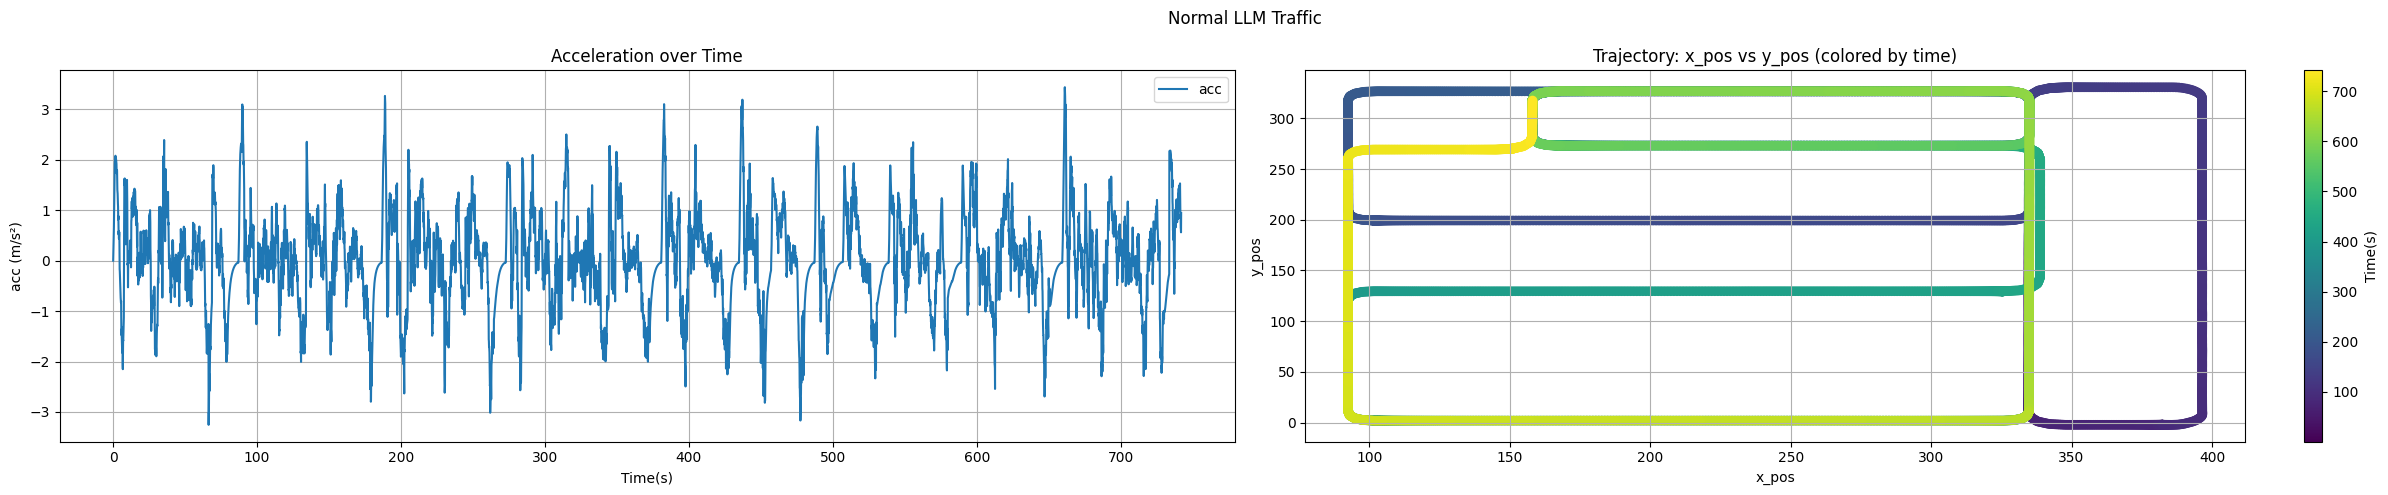

In [13]:
data_path = f"../data/synthetic/{mapname}/sumo"
df_aggressive_fixed_traffic = pd.read_csv(f"{data_path}/fixed/traffic/veh_0_aggressive.csv")
df_aggressive_llm_traffic = pd.read_csv(f"{data_path}/llm/traffic/veh_0_aggressive.csv")
df_normal_fixed_traffic = pd.read_csv(f"{data_path}/fixed/traffic/veh_0_normal.csv")
df_normal_llm_traffic = pd.read_csv(f"{data_path}/llm/traffic/veh_0_normal.csv")

figs_path = f"../results/figures/sumo/{mapname}"
plot_df(df_aggressive_fixed_traffic, title="Aggressive Fixed Traffic", output_path=f"{figs_path}/aggressive_fixed.png")
plot_df(df_aggressive_llm_traffic, title="Aggressive LLM Traffic", output_path=f"{figs_path}/aggressive_llm.png")
plot_df(df_normal_fixed_traffic, title="Normal Fixed Traffic", output_path=f"{figs_path}/normal_fixed.png")
plot_df(df_normal_llm_traffic, title="Normal LLM Traffic", output_path=f"{figs_path}/normal_llm.png")